In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
d=pd.read_csv(r"NewspaperData.csv")
d.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
d

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
d.sample(10)

,Newspaper,daily,sunday
30,St. Louis Post-Dispatch,391.286,585.681
29,San Francisco Chronicle,570.364,704.322
33,Washington Post,838.902,1165.567
26,Rochester Democrat & Chronicle,133.239,262.048
24,Portland Oregonian,337.672,440.923
12,Los Angeles Daily News,185.736,202.614
8,Des Moines Register,206.204,344.522
10,Houston Chronicle,449.755,620.752
15,Minneapolis Star Tribune,412.871,685.975
6,Cincinnati Enquirer,198.832,348.744


In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [6]:
d.shape

(34, 3)

In [13]:
d.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [15]:
d.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dt=lb.fit_transform(d['Newspaper'])
dt

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [19]:
d.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [21]:
d.drop('Newspaper',axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: xlabel='daily', ylabel='Density'>

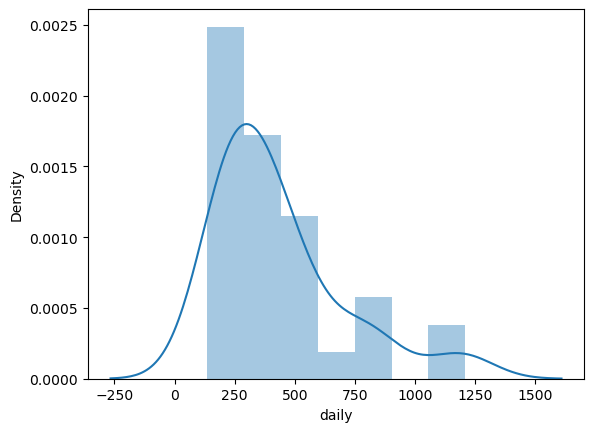

In [23]:
sns.distplot(d['daily'])

In [25]:
import matplotlib.pyplot as plt

<Axes: xlabel='sunday', ylabel='Density'>

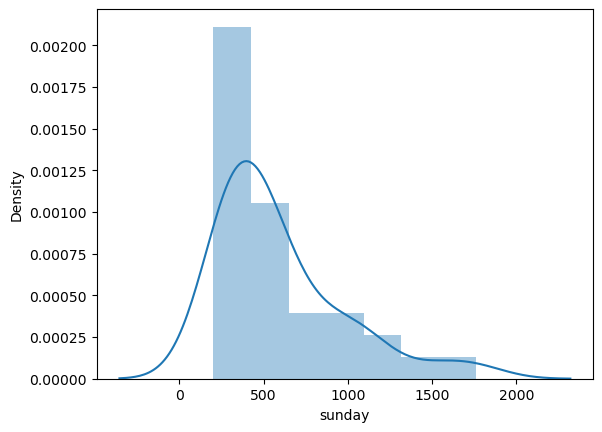

In [27]:
sns.distplot(d['sunday'])

<Axes: xlabel='sunday', ylabel='Count'>

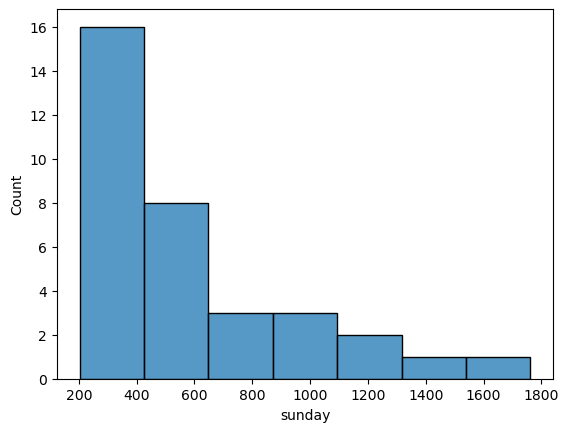

In [29]:
sns.histplot(d['sunday'])

In [31]:
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=d).fit()
#with population

<Axes: xlabel='daily', ylabel='sunday'>

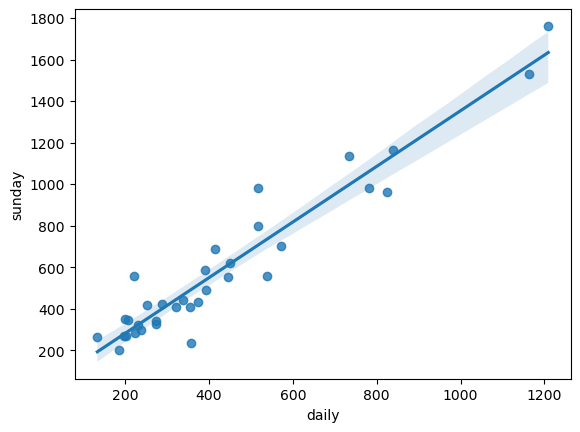

In [33]:
sns.regplot(x='daily',y='sunday',data=d)

<Axes: xlabel='daily', ylabel='sunday'>

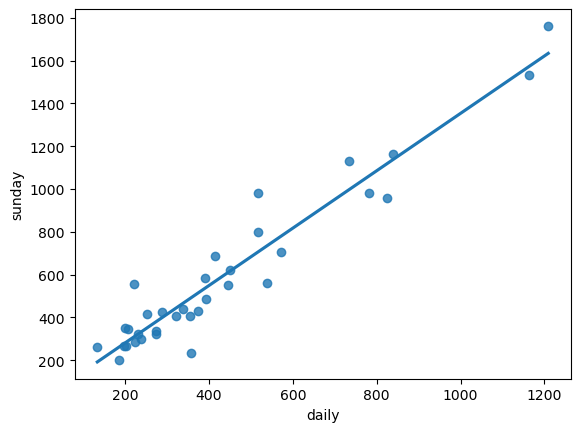

In [35]:
sns.regplot(x='daily',y='sunday',data=d,ci=None)

In [44]:
#coefficient
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [46]:
print(model.tvalues,'\n',model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [55]:
# R squared values model's strength 0-1 is good model
#model accuracy above 0.7 is inly acceptable 
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [75]:
new_data=pd.Series([1000,3000])
new_data

0    1000
1    3000
dtype: int64

In [77]:
data_pred=pd.DataFrame(new_data,columns=['daily'])
data_pred

,daily
0,1000
1,3000


In [79]:
model.predict(data_pred)

0    1353.550388
1    4032.979903
dtype: float64